# Description of the Dataset

TFI has provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants. 
The data columns include the open date, location, city type, and three categories of obfuscated data: 
Demographic data, Real estate data, and Commercial data. 
The revenue column indicates a (transformed) revenue of the restaurant in a given year 
and is the target of predictive analysis. 

Data fields
Id : Restaurant id. 
Open Date : opening date for a restaurant
City : City that the restaurant is in. Note that there are unicode in the names. 
City Group: Type of the city. Big cities, or Other. 
Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
P1, P2 - P37: There are three categories of these obfuscated data. 
    Demographic data are gathered from third party providers with GIS systems. 
    These include population in any given area, age and gender distribution, development scales. 
    Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. 
    Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is 
    the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

# Data Exploration

In [1]:
#Importing the necessary libraries for data manipulation
import numpy as np
import pandas as pd

#Importing for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Importing packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#One hot encode categorical data--Convert to dummy
from sklearn.preprocessing import OneHotEncoder 

#Scale numeric data
from sklearn.preprocessing import StandardScaler

#Display outputs of all commands from a cell--not just of the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Import warnings module
import warnings
warnings.filterwarnings("ignore")

# Importing restaurant data

In [2]:
train = pd.read_csv('C:\\Users\\HP\\Desktop\\FORE\\TERM-4\\Big Data & Data Analytics for Managers\\restaurant-train.csv')
test = pd.read_csv('C:\\Users\\HP\\Desktop\\FORE\\TERM-4\\Big Data & Data Analytics for Managers\\test.csv')

In [3]:
#read the first 5 records of the train dataset
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,03-09-2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02-02-2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05-09-2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [4]:
#reading the first 5 records of the test dataset
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [5]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [6]:
test.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,28867.657797,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49999.500000,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74999.250000,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,99999.000000,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


In [7]:
#shape of both the datasets
train.shape
test.shape

(137, 43)

(100000, 42)

In [8]:
#Transform 'Open date' to datetime
train['Open Date'] = pd.to_datetime(train['Open Date'])
test['Open Date'] = pd.to_datetime(test['Open Date'])

# Pre-Processing/ Data Cleaning

# Checking for missing values

In [9]:
train.isnull().sum()
#there are no missing values

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [10]:
test.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

# Target Variable Distribution

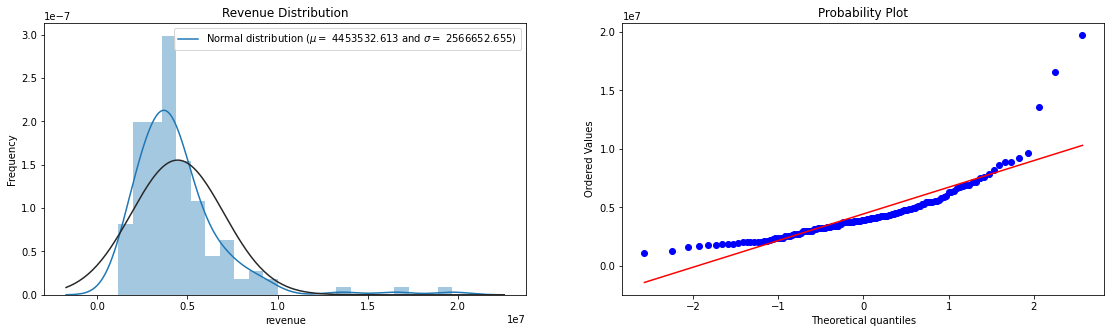

In [11]:
from scipy.stats import norm
from scipy import stats
(mu, sigma) = norm.fit(train['revenue'])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(train['revenue'] , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Revenue Distribution')
ax2 = stats.probplot(train['revenue'], plot=plt)
f.show();

The distribution shows that the data is right skewed. 
The data values range between 1.149870e+06 and 1e+07. There also appears to be outliers which will cause issues in model training. Since we will be experimenting with linear models, the target variable will be transformed to make it normally distributed for improved model interpretation. The target variable was log transformed so the final predictions will need to be exponentiated to rescale the results back to normal.

There were 3 data points which were outliers in the data. It is clear that these three resturants have made a significant renvenue despite the fact that they opened in the years 2000 and 2005, unlike other resturants.

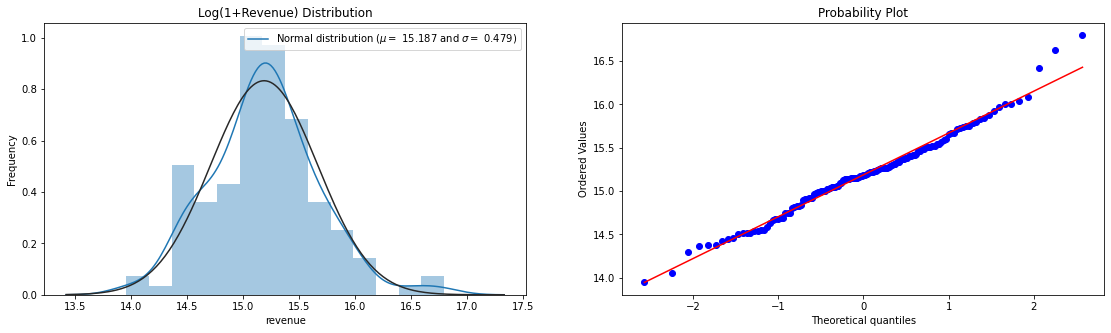

In [12]:
# Revenue is right skewed, taking the log will make it more normally distributed for the linear models
# Remember to use expm1 on predictions to transform back to dollar amount
(mu, sigma) = norm.fit(np.log1p(train['revenue']))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(np.log1p(train['revenue']) , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Log(1+Revenue) Distribution')
ax2 = stats.probplot(np.log(train['revenue']), plot=plt)
f.show();

Log transformation of these variables actually ended up making the linear models better in predicting the target variable. 

In [13]:
#to obtain all numeric columns
numeric = [col for col in train.columns[2:] if train[col].dtypes!='object']
print('numeric columns are:',numeric)
#to obtain all categorical columns
categorical = [col for col in train.columns if train[col].dtypes=='object']
print('categorical columns are:',categorical)

numeric columns are: ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']
categorical columns are: ['City', 'City Group', 'Type']


In [14]:
train[categorical].head()

,City,City Group,Type
0,İstanbul,Big Cities,IL
1,Ankara,Big Cities,FC
2,Diyarbakır,Other,IL
3,Tokat,Other,IL
4,Gaziantep,Other,IL


# Exploratory Data Analysis

# Analyzing Categorical Columns

In [15]:
#Count of cities in both the datasets
train['City'].nunique()
test['City'].nunique()
#train data contains more cities than the test data

34

57

<AxesSubplot:>

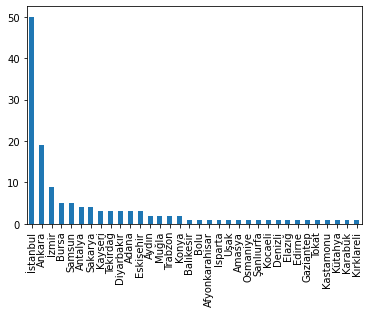

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Antalya            4
Sakarya            4
Kayseri            3
Tekirdağ           3
Diyarbakır         3
Adana              3
Eskişehir          3
Aydın              2
Muğla              2
Trabzon            2
Konya              2
Balıkesir          1
Bolu               1
Afyonkarahisar     1
Isparta            1
Uşak               1
Amasya             1
Osmaniye           1
Şanlıurfa          1
Kocaeli            1
Denizli            1
Elazığ             1
Edirne             1
Gaziantep          1
Tokat              1
Kastamonu          1
Kütahya            1
Karabük            1
Kırklareli         1
Name: City, dtype: int64


In [16]:
# Plot cities in the train dataset as per frequency of occurence
train["City"].value_counts().plot(kind='bar')
plt.show()
print(train["City"].value_counts())

As the categorical variables chart shows that Instanbul is making the most revenues compared to other cities, So that Opening a resturant in Instanbul would be a great Idea

In [17]:
#Plot cities in test dataset using the names of cities appearing in the train dataset
city_train_arr = train["City"].unique()
test["City"] = test["City"].map(lambda x: 'Other' if x not in city_train_arr else x) 
#if the name of the city does not appear in the train dataset then the reamining cities will be alloted 'other'.

<AxesSubplot:>

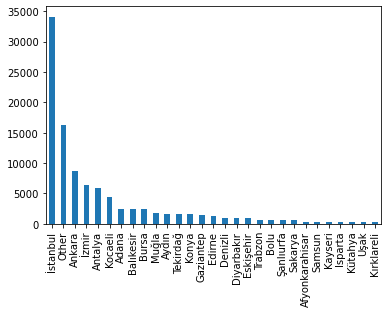

İstanbul          34087
Other             16243
Ankara             8720
İzmir              6465
Antalya            5911
Kocaeli            4364
Adana              2514
Balıkesir          2463
Bursa              2441
Muğla              1823
Aydın              1617
Tekirdağ           1577
Konya              1576
Gaziantep          1487
Edirne             1230
Denizli             964
Diyarbakır          954
Eskişehir           900
Trabzon             660
Bolu                631
Şanlıurfa           609
Sakarya             604
Afyonkarahisar      331
Samsun              324
Kayseri             323
Isparta             304
Kütahya             304
Uşak                293
Kırklareli          281
Name: City, dtype: int64


In [18]:
# Plot for cities appearing in the test dataset
test["City"].value_counts().plot(kind='bar')
plt.show()
print(test["City"].value_counts())

As the categorical variables chart shows that Istanbul is making the most revenues compared to other cities, So that Opening a resturant in Instanbul would be a great Idea

In [19]:
#Different types of restaurants
#Made an array of different types of restaurants in both the datasets
type_train_arr = train["Type"].unique()
test["Type"] = test["Type"].map(lambda x: 'Other' if x not in type_train_arr else x)
print(test["Type"].unique().shape)
print(test["Type"].unique())
#there are 4 types of restuarants in the dataset, namely, FC: Food Court, IL: Inline, DT: Drive Thru, and Other

(4,)
['FC' 'IL' 'DT' 'Other']


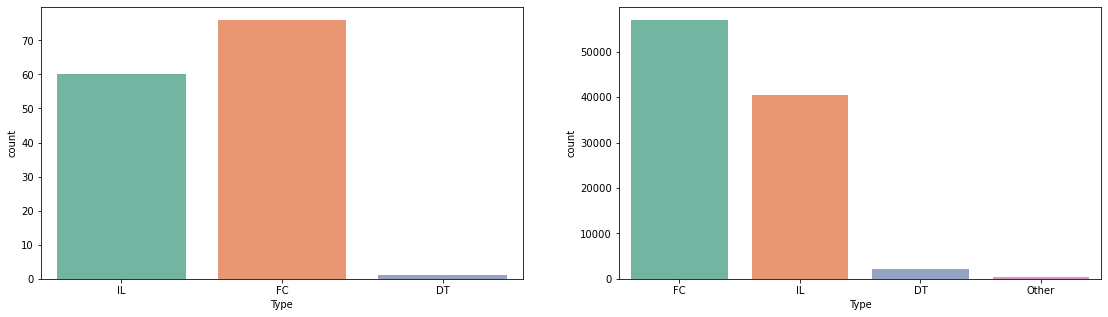

In [20]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(train['Type'],palette="Set2", ax=ax[0]);
g2 = sns.countplot(test['Type'],palette="Set2", ax=ax[1]);
fig.show()

Opening a restaurant will be better as a FC-Food court and IL (inline)

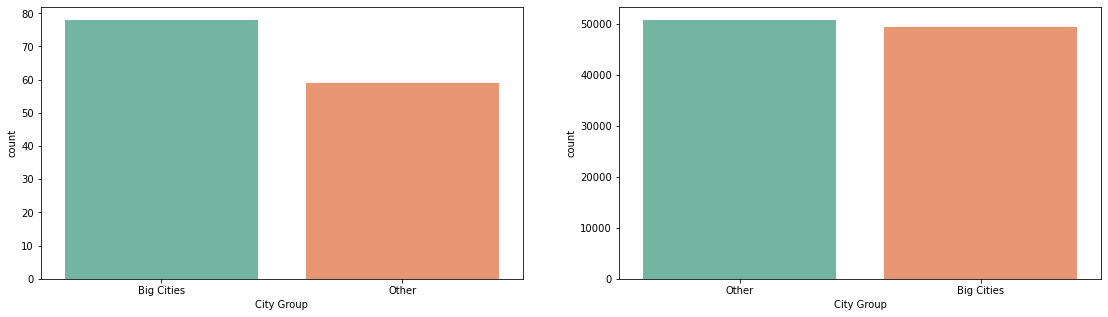

In [21]:
#Presence of restaurant in big cities or not
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(train['City Group'],palette="Set2", ax=ax[0]);
g2 = sns.countplot(test['City Group'],palette="Set2", ax=ax[1]);
fig.show()

It is clear that big cities are making more revenues than smaller cities yet the gap between them is narrowing 

# Analyzing Numeric Columns

<AxesSubplot:>

(0.0, 0.22519346847728638)

<AxesSubplot:>

(0.0, 0.34402068027977095)

<AxesSubplot:>

(0.0, 0.6760947869992868)

<AxesSubplot:>

(0.0, 0.5968192919061798)

<AxesSubplot:>

(0.0, 0.48929455914408515)

<AxesSubplot:>

(0.0, 0.28351192348692655)

<AxesSubplot:>

(0.0, 0.35829212933236326)

<AxesSubplot:>

(0.0, 0.3637332943889673)

<AxesSubplot:>

(0.0, 0.41055729043750383)

<AxesSubplot:>

(0.0, 0.41673228344539714)

<AxesSubplot:>

(0.0, 0.2429083941988277)

<AxesSubplot:>

(0.0, 0.37228149570255903)

<AxesSubplot:>

(0.0, 0.6425772508539453)

<AxesSubplot:>

(0.0, 0.285223417171344)

<AxesSubplot:>

(0.0, 0.31717261563985505)

<AxesSubplot:>

(0.0, 0.21603425451586275)

<AxesSubplot:>

(0.0, 0.38510778162452575)

<AxesSubplot:>

(0.0, 0.2231150995961905)

<AxesSubplot:>

(0.0, 0.1351753574164006)

<AxesSubplot:>

(0.0, 0.1514247608110895)

<AxesSubplot:>

(0.0, 0.34087008320774714)

<AxesSubplot:>

(0.0, 0.357477259302744)

<AxesSubplot:>

(0.0, 0.1674090475166917)

<AxesSubplot:>

(0.0, 0.32990753172276943)

<AxesSubplot:>

(0.0, 0.35593353487675494)

<AxesSubplot:>

(0.0, 0.29408758702620713)

<AxesSubplot:>

(0.0, 0.374971591286755)

<AxesSubplot:>

(0.0, 0.2651510464544386)

<AxesSubplot:>

(0.0, 0.4398187247477566)

<AxesSubplot:>

(0.0, 0.1393053596468475)

<AxesSubplot:>

(0.0, 0.22039904347650283)

<AxesSubplot:>

(0.0, 0.1523013329207288)

<AxesSubplot:>

(0.0, 0.4244164554006153)

<AxesSubplot:>

(0.0, 0.15603961860571886)

<AxesSubplot:>

(0.0, 0.21457149273810341)

<AxesSubplot:>

(0.0, 0.18172330053105273)

<AxesSubplot:>

(0.0, 0.41500182513485073)

<AxesSubplot:>

(0.0, 2.2362589580815184e-07)

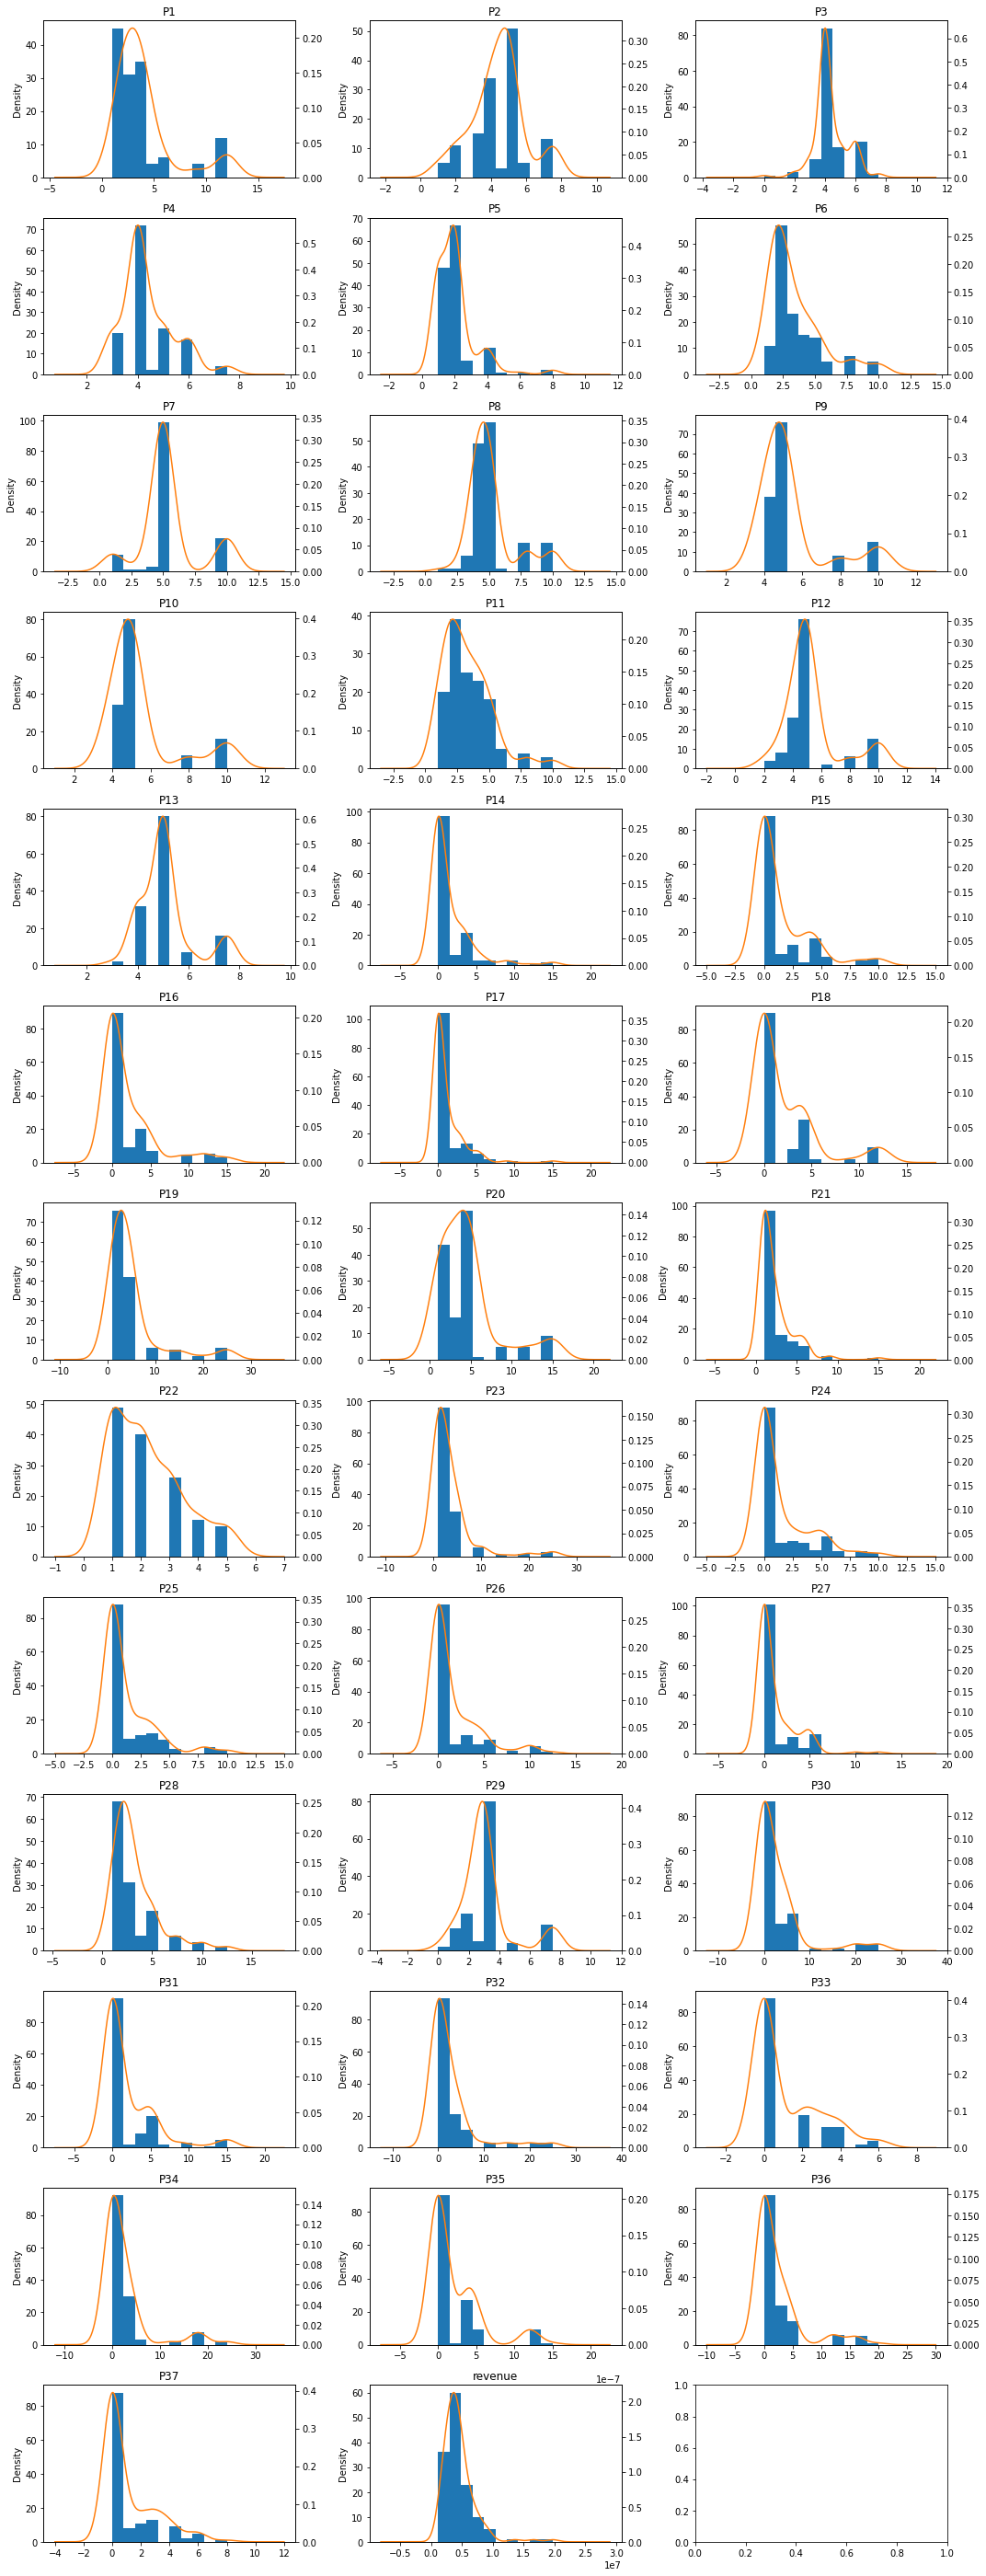

In [22]:
k = len(train[numeric].columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(train[numeric].iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

The distributions clearly shows that there are clear anamolies in some of the features in hand. 
These anamonlies have to be studied carefully.
Also, the distributions above describes certain biases that made that data distribution either not fair or skewed for some reason
For instance if we look at P37 : value zero is more likely to show among the feature values, 
possibly this is a data entry error or there something important that number zero represents

In [23]:
train[train['P37']  == 0].shape
#out of 134 data points P37 has 86 zeros

(88, 43)

# Analyzing Relationships Between Numerical Variables and the target variable

<AxesSubplot:xlabel='P1', ylabel='revenue'>

<AxesSubplot:xlabel='P2', ylabel='revenue'>

<AxesSubplot:xlabel='P3', ylabel='revenue'>

<AxesSubplot:xlabel='P4', ylabel='revenue'>

<AxesSubplot:xlabel='P5', ylabel='revenue'>

<AxesSubplot:xlabel='P6', ylabel='revenue'>

<AxesSubplot:xlabel='P7', ylabel='revenue'>

<AxesSubplot:xlabel='P8', ylabel='revenue'>

<AxesSubplot:xlabel='P9', ylabel='revenue'>

<AxesSubplot:xlabel='P10', ylabel='revenue'>

<AxesSubplot:xlabel='P11', ylabel='revenue'>

<AxesSubplot:xlabel='P12', ylabel='revenue'>

<AxesSubplot:xlabel='P13', ylabel='revenue'>

<AxesSubplot:xlabel='P14', ylabel='revenue'>

<AxesSubplot:xlabel='P15', ylabel='revenue'>

<AxesSubplot:xlabel='P16', ylabel='revenue'>

<AxesSubplot:xlabel='P17', ylabel='revenue'>

<AxesSubplot:xlabel='P18', ylabel='revenue'>

<AxesSubplot:xlabel='P19', ylabel='revenue'>

<AxesSubplot:xlabel='P20', ylabel='revenue'>

<AxesSubplot:xlabel='P21', ylabel='revenue'>

<AxesSubplot:xlabel='P22', ylabel='revenue'>

<AxesSubplot:xlabel='P23', ylabel='revenue'>

<AxesSubplot:xlabel='P24', ylabel='revenue'>

<AxesSubplot:xlabel='P25', ylabel='revenue'>

<AxesSubplot:xlabel='P26', ylabel='revenue'>

<AxesSubplot:xlabel='P27', ylabel='revenue'>

<AxesSubplot:xlabel='P28', ylabel='revenue'>

<AxesSubplot:xlabel='P29', ylabel='revenue'>

<AxesSubplot:xlabel='P30', ylabel='revenue'>

<AxesSubplot:xlabel='P31', ylabel='revenue'>

<AxesSubplot:xlabel='P32', ylabel='revenue'>

<AxesSubplot:xlabel='P33', ylabel='revenue'>

<AxesSubplot:xlabel='P34', ylabel='revenue'>

<AxesSubplot:xlabel='P35', ylabel='revenue'>

<AxesSubplot:xlabel='P36', ylabel='revenue'>

<AxesSubplot:xlabel='P37', ylabel='revenue'>

<AxesSubplot:xlabel='revenue', ylabel='revenue'>

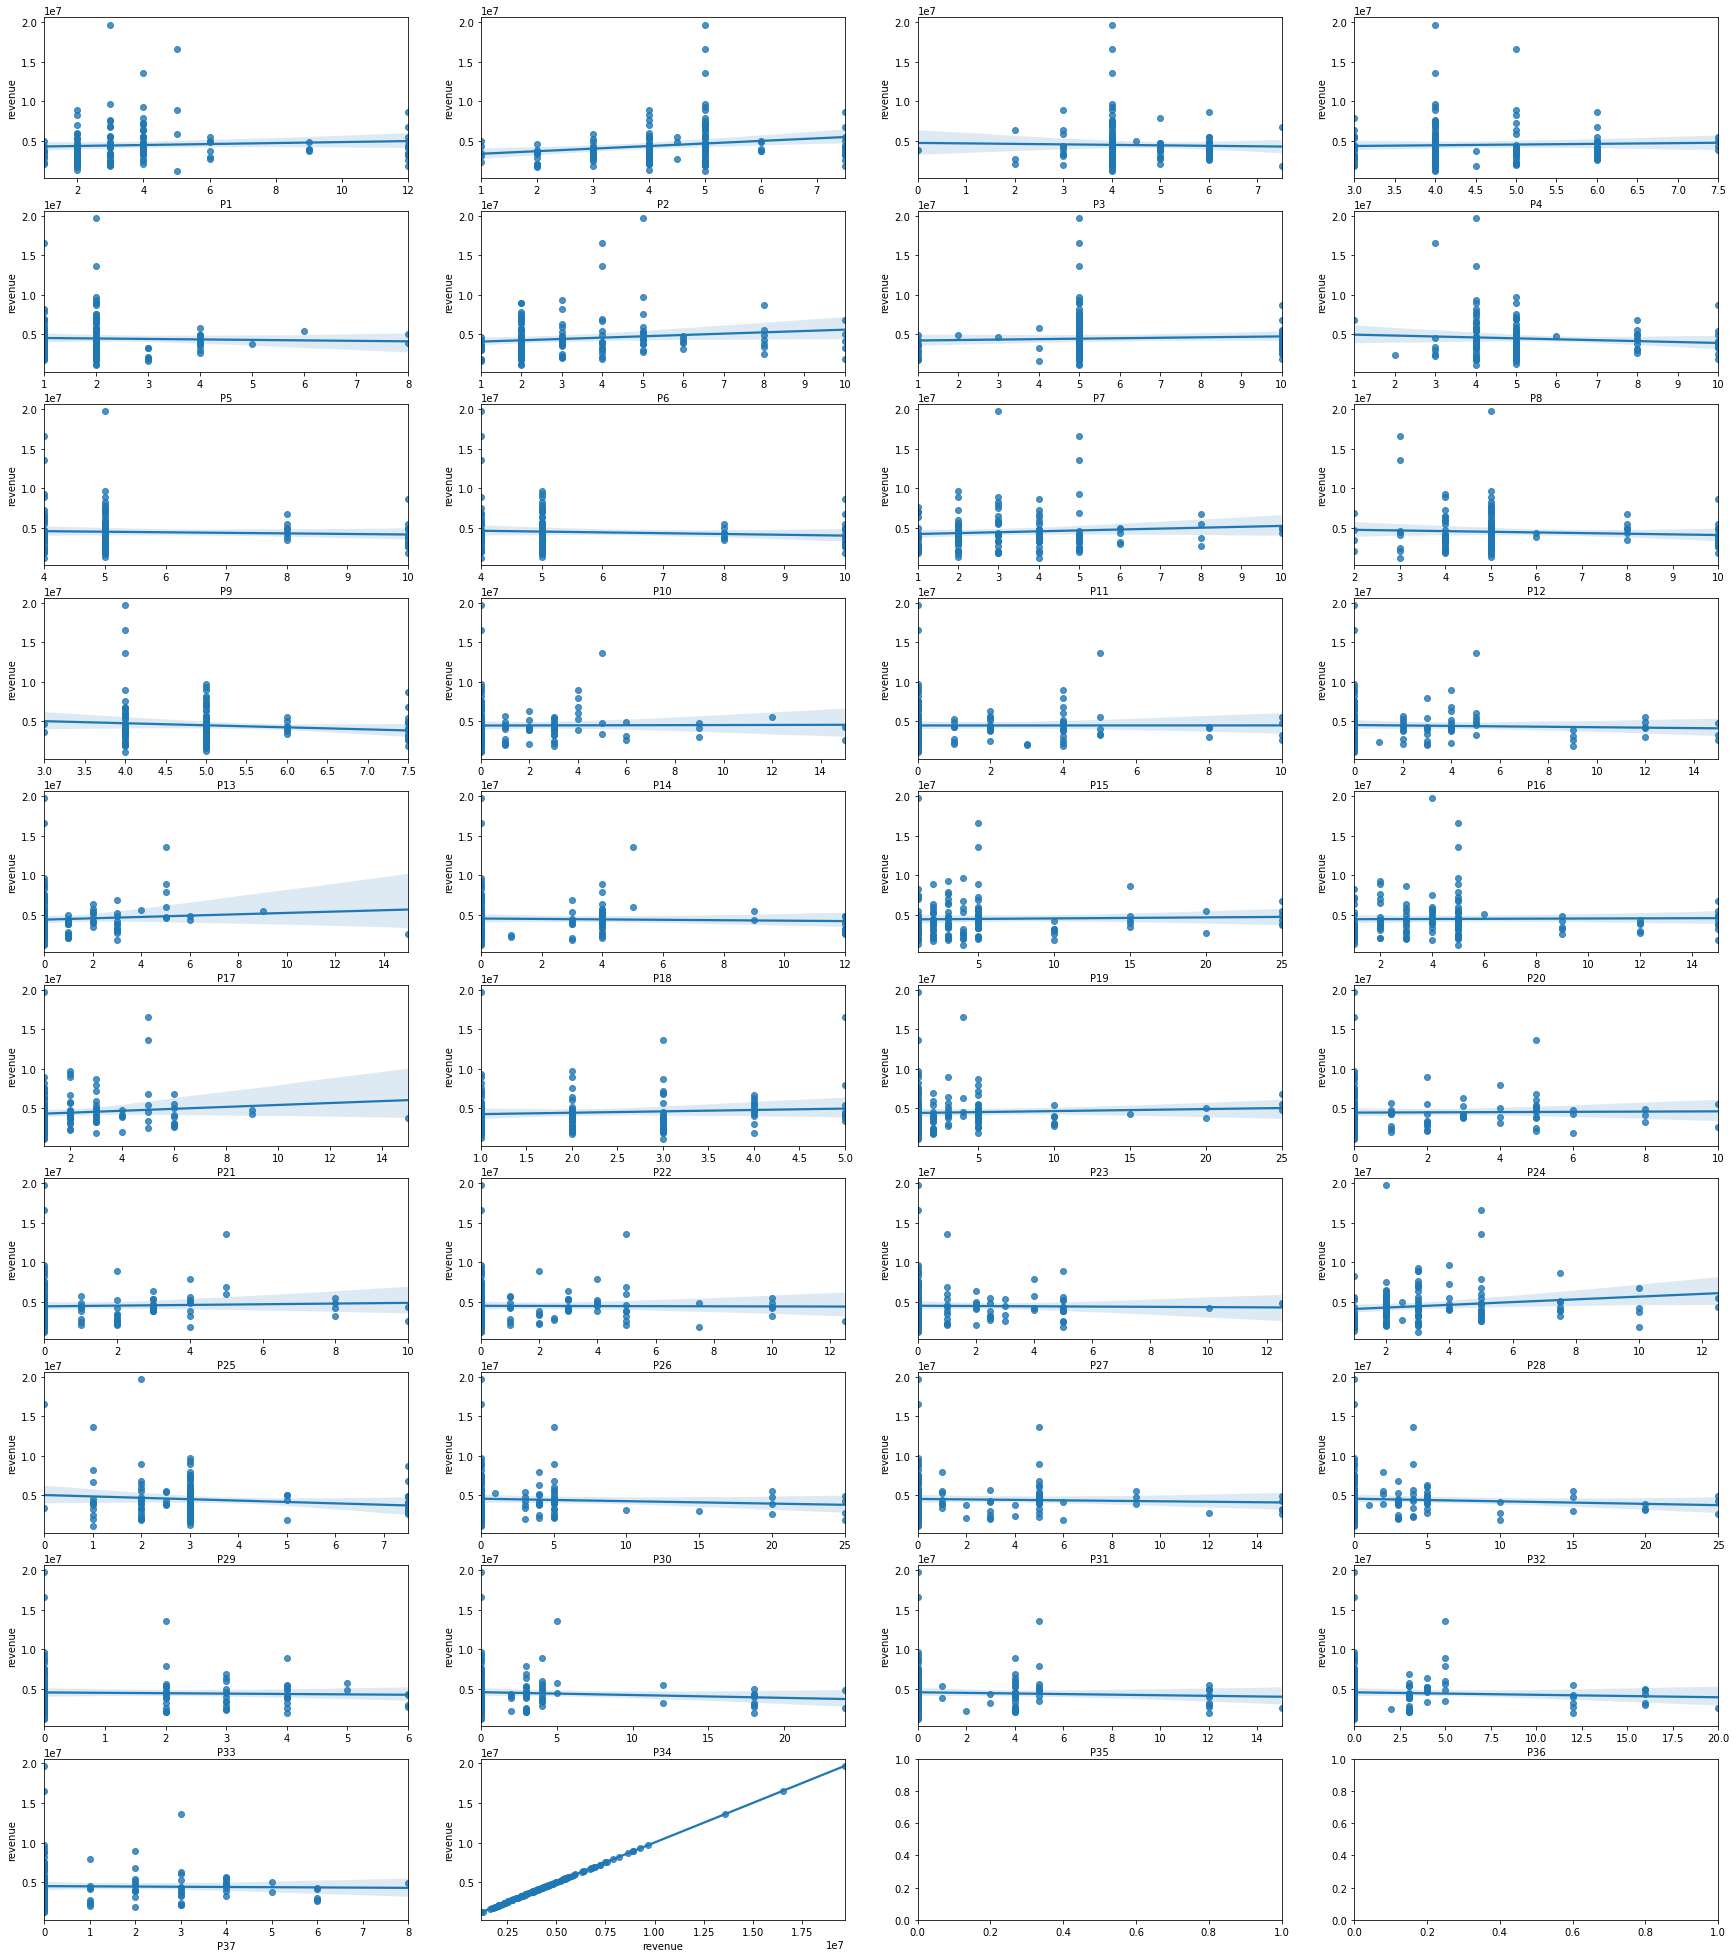

In [24]:
fig, ax = plt.subplots(10, 4, figsize=(30, 35))
for variable, subplot in zip(numeric, ax.flatten()):
    sns.regplot(x=train[variable], y=train['revenue'], ax=subplot)

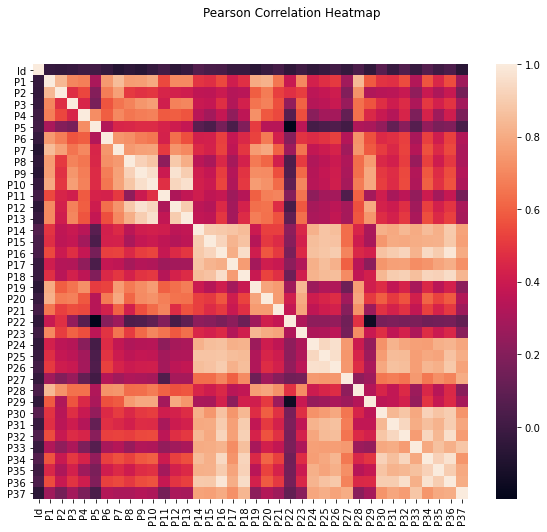

In [25]:
# Correlation between numeric features with revenue
plt.figure(figsize=(10, 8))
sns.heatmap(train.drop(['revenue','City Group','Type'], axis=1).corr(), square=True)
plt.suptitle('Pearson Correlation Heatmap')
plt.show();

As the heatmap and the scatter distribution clearly shows that there is no obvious releation between numerical variables independently with the target

# Analyzing Relationships between the Categorical Variables and the target variable

<AxesSubplot:xlabel='City', ylabel='revenue'>

<AxesSubplot:xlabel='City Group', ylabel='revenue'>

<AxesSubplot:xlabel='Type', ylabel='revenue'>

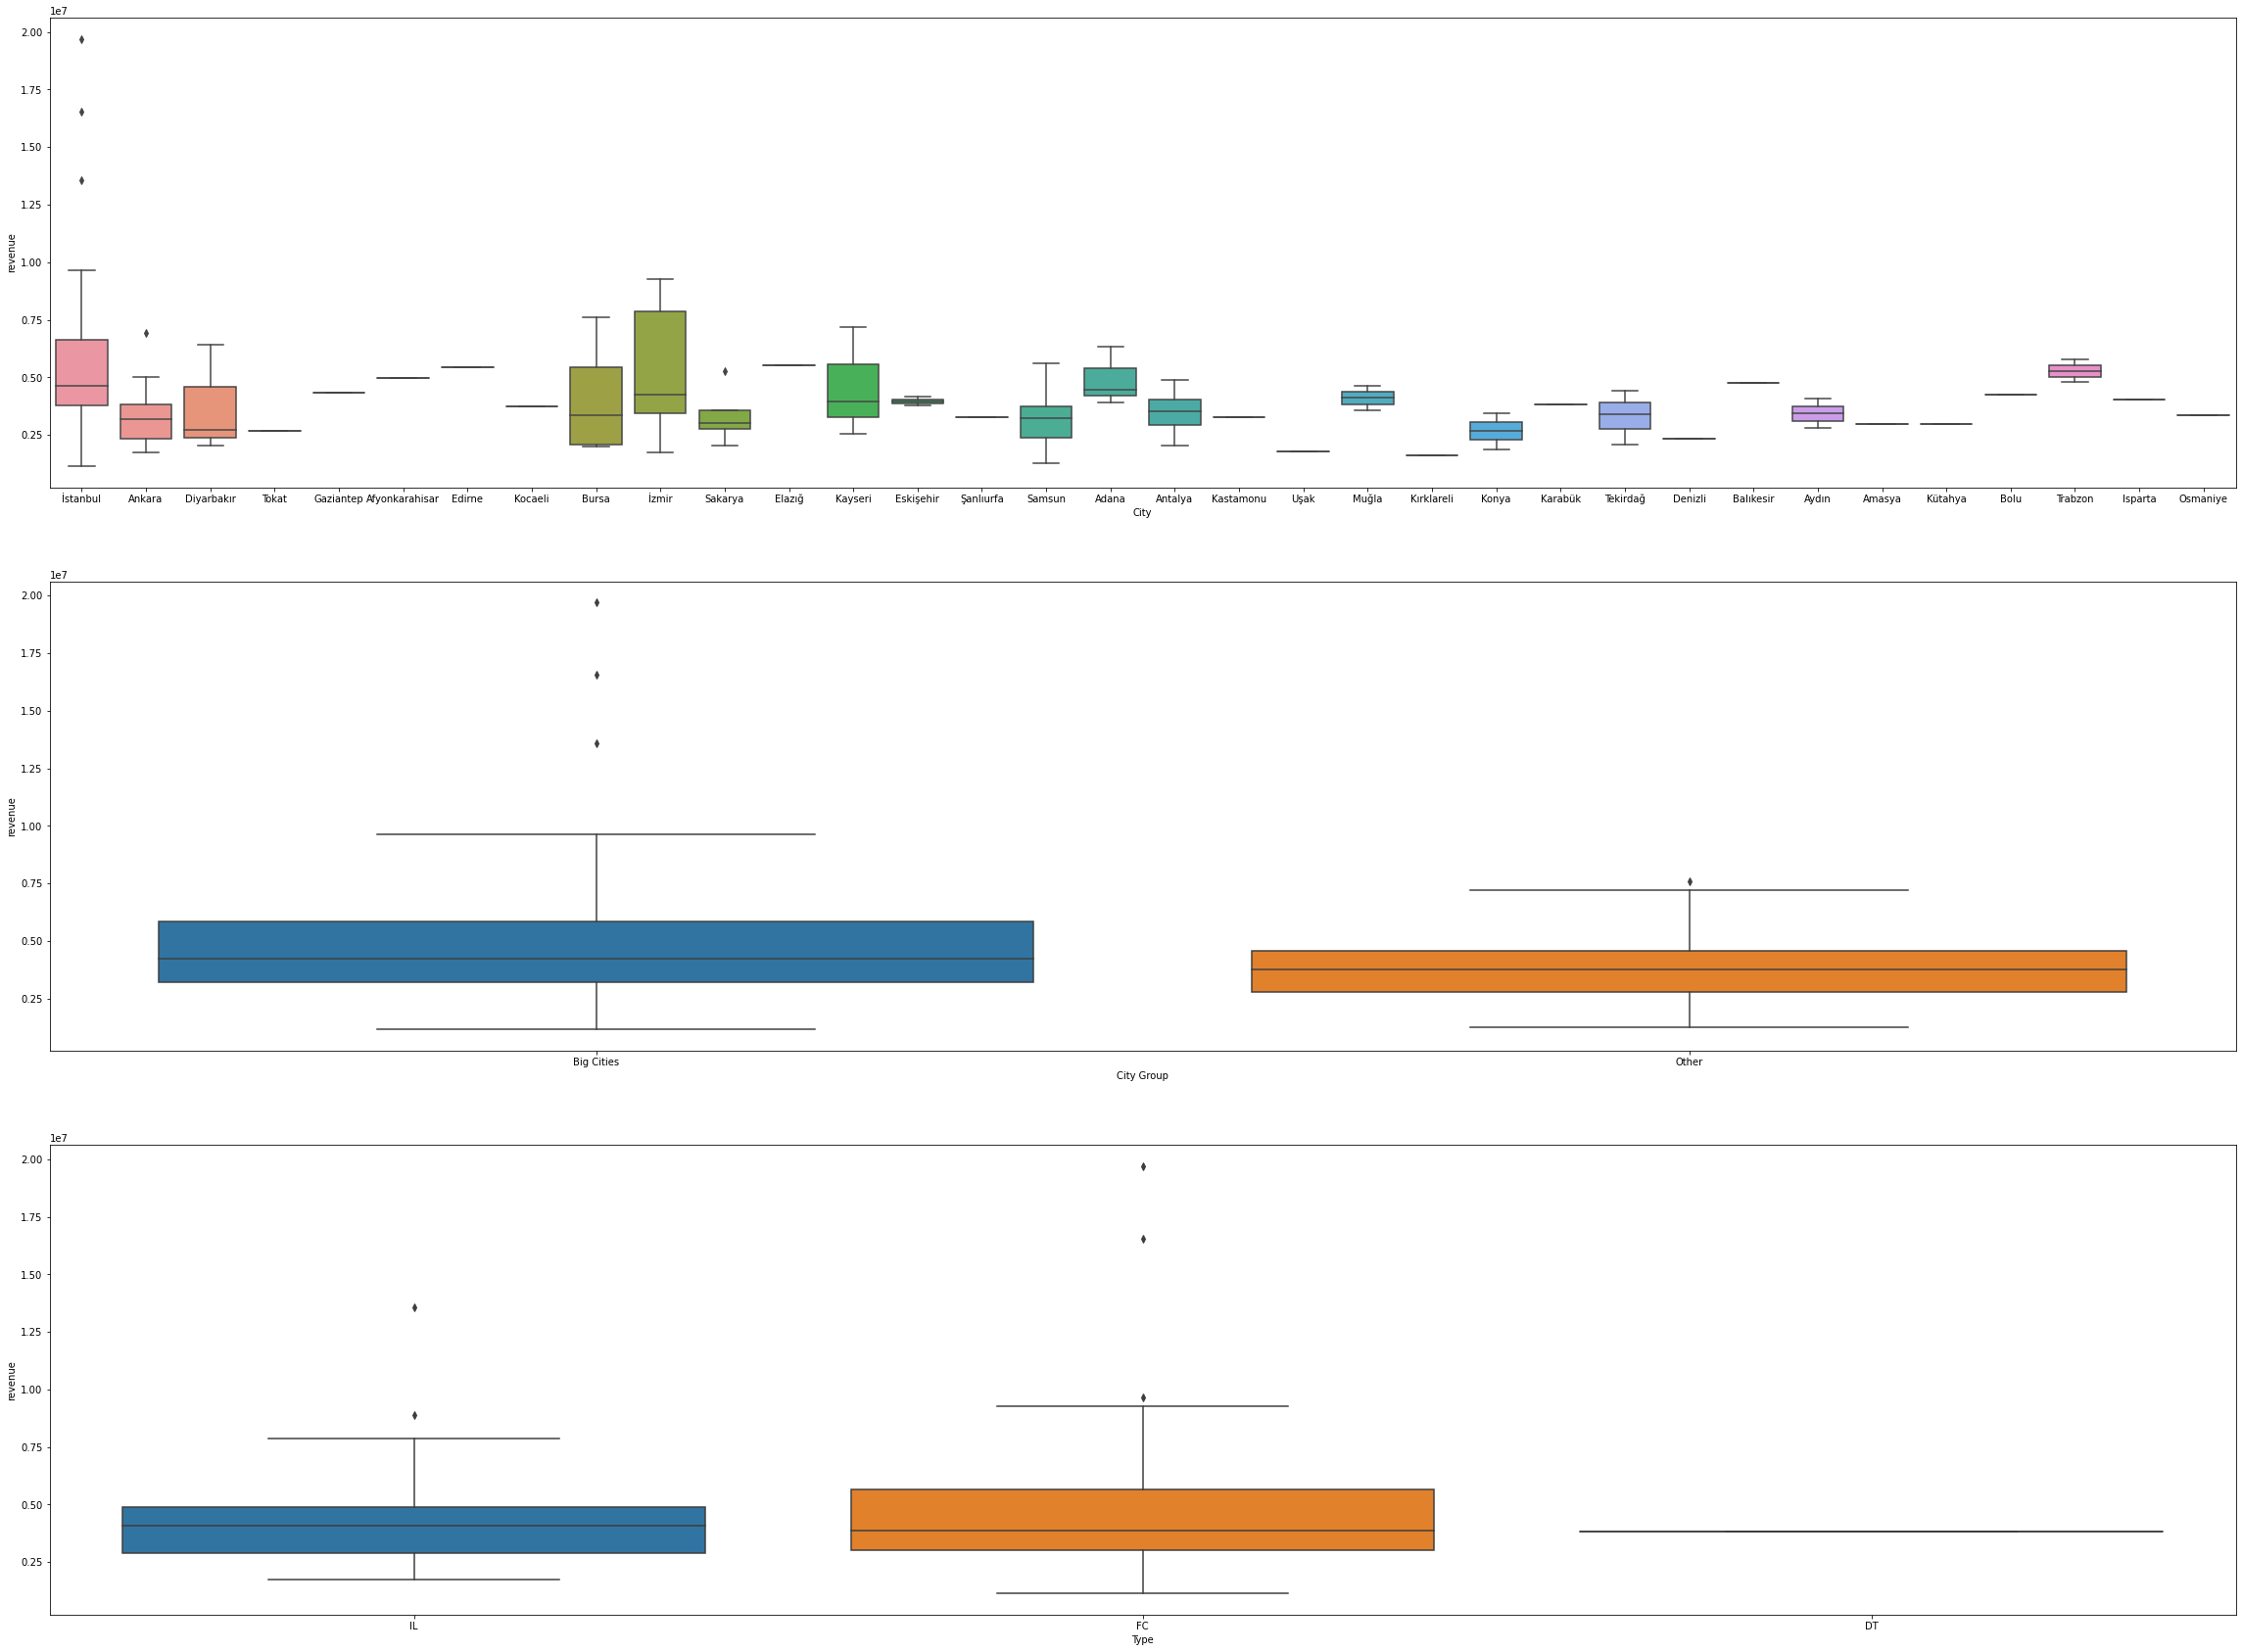

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='revenue', data=train, ax=subplot)

The box plots gives us meaningful insight, as the graph clearly shows that the city of Izmair has a wider range of 
distributed values in revneue with slighly lower median than istanbul, 
Ankara could be a good place for opening a restaurant and making renveue in time shorter than required 
if the same resturant is opened in Istanbul

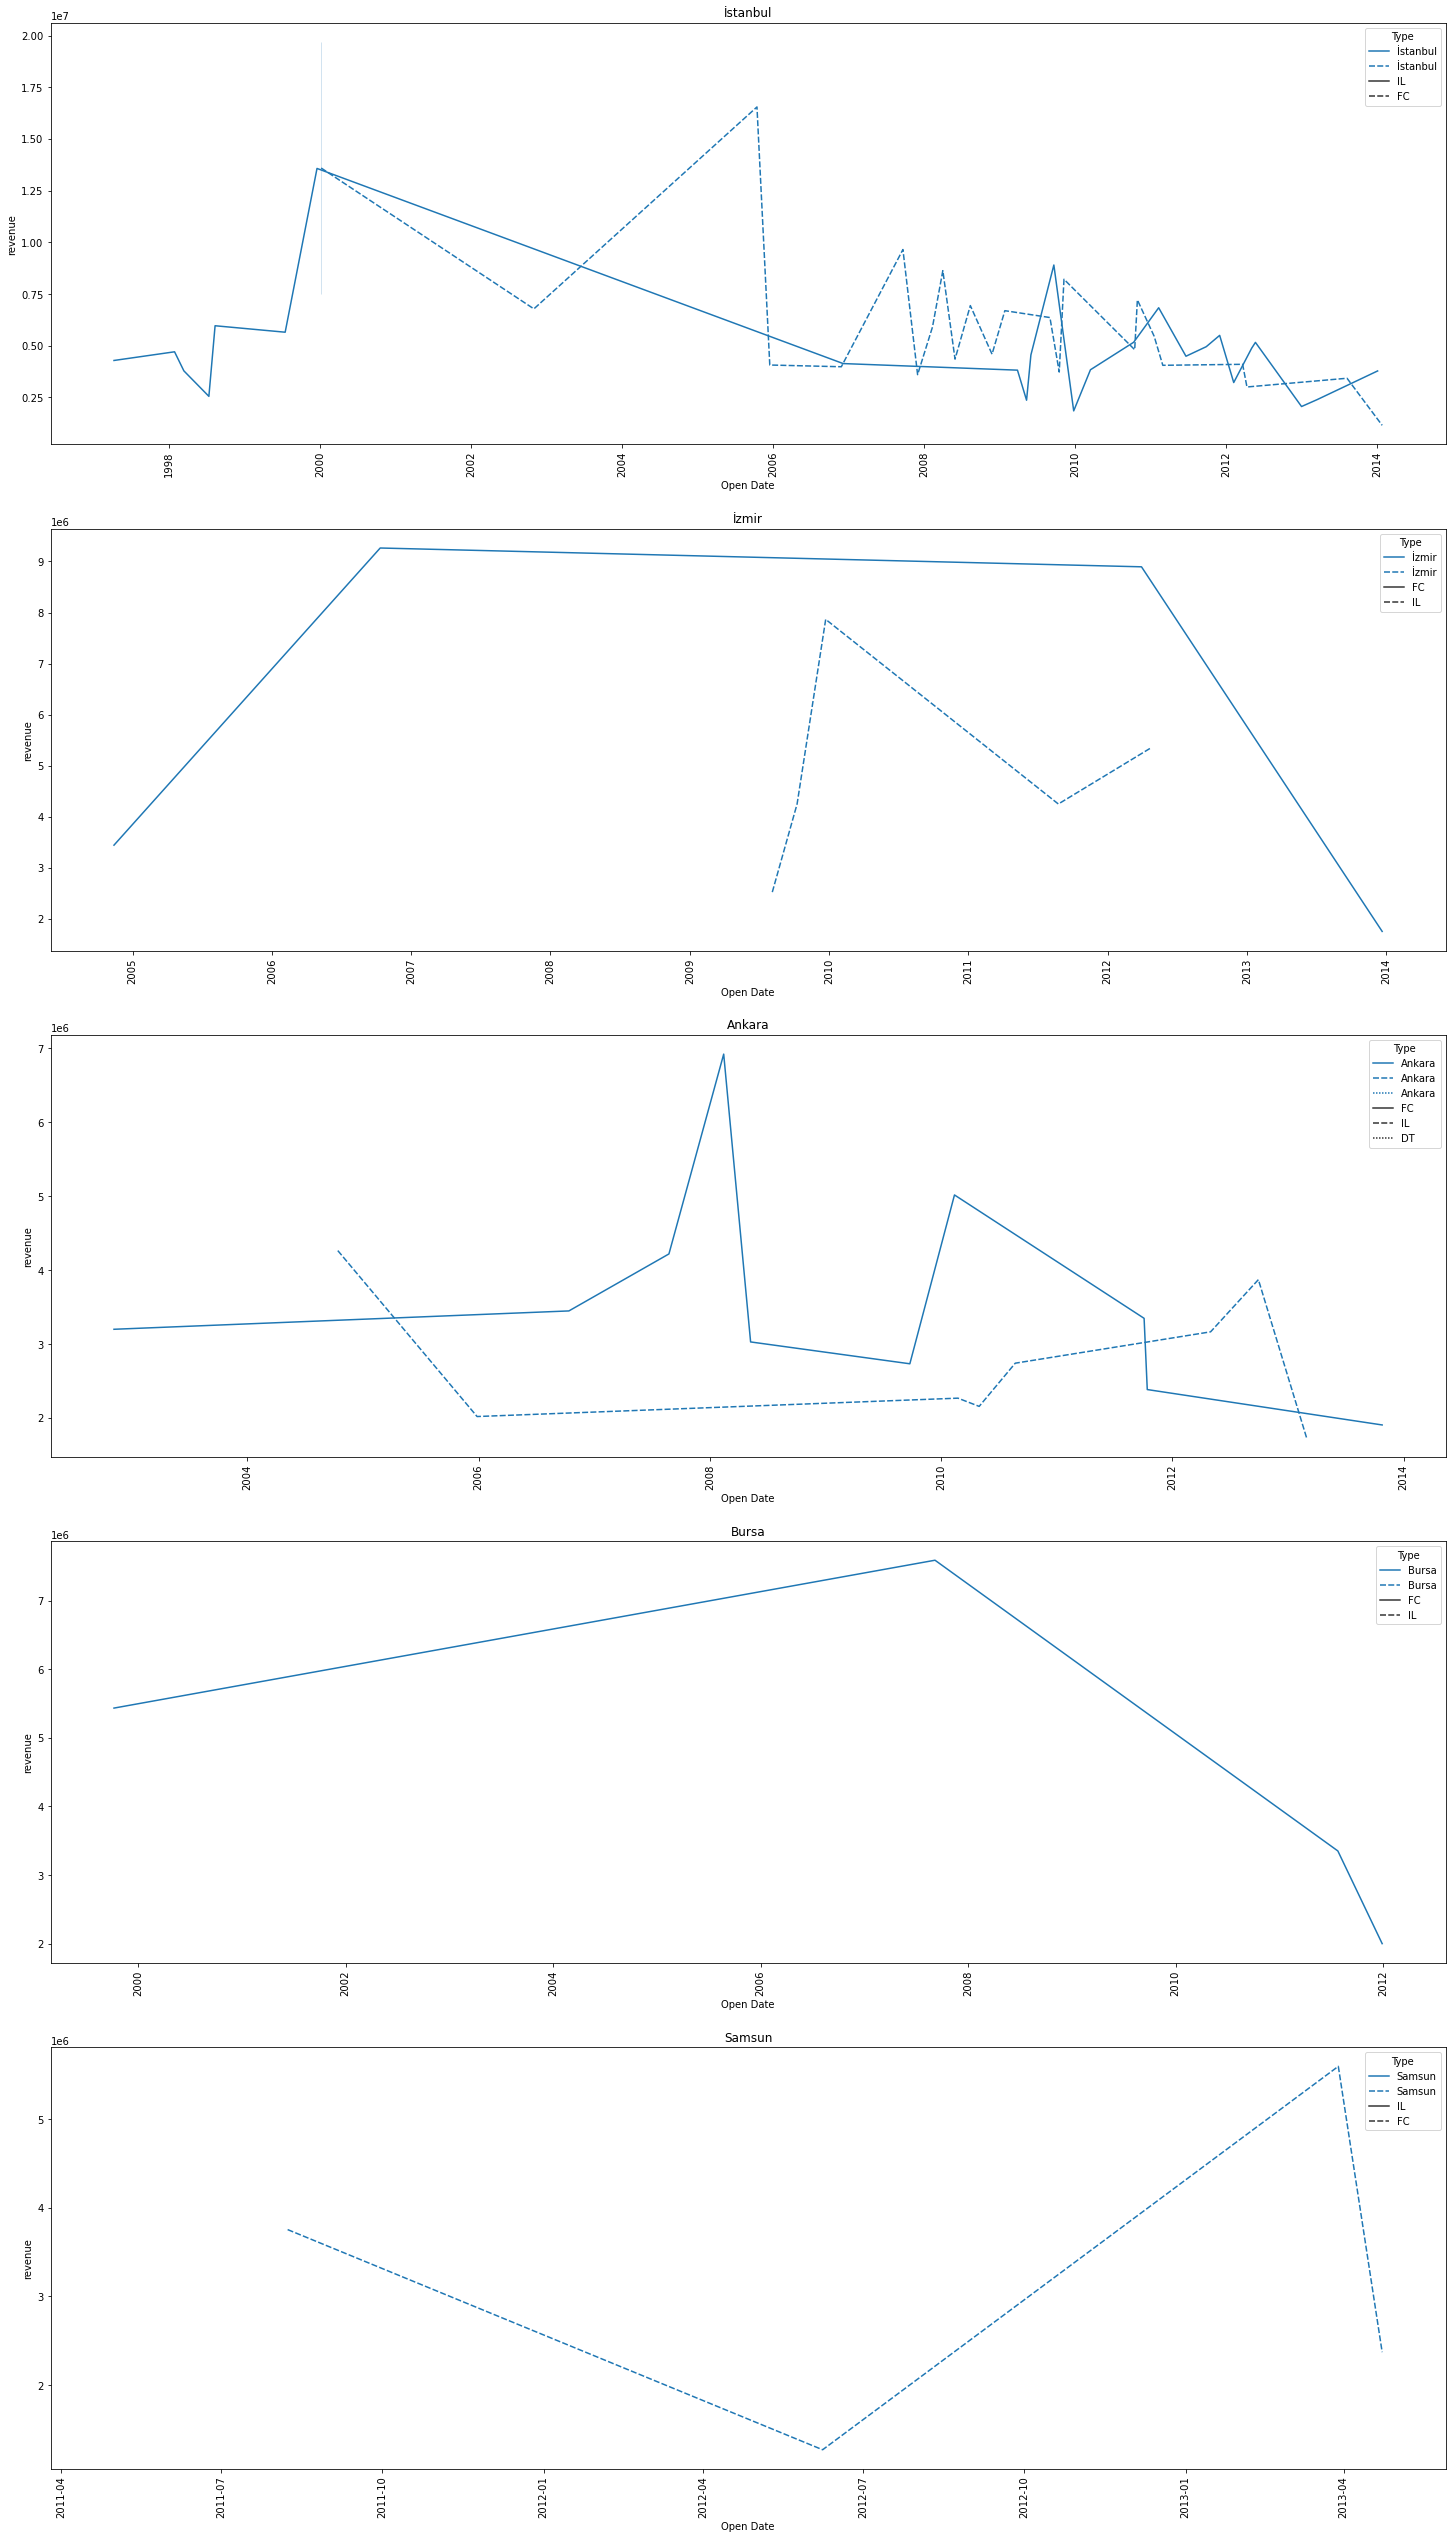

In [27]:
tem = train.copy()
cats = ['İstanbul','İzmir','Ankara','Bursa','Samsun']
fig, ax = plt.subplots(5,1, figsize=(25, 45))

for variable, subplot in zip(cats, ax.flatten()):
    x=tem[train["City"]==variable]
    x = x.sort_values( by='Open Date')
    if len(x) <= 4:        
        g = sns.barplot(x="Open Date", y="revenue",hue="Type", data=x, ax=subplot)
        g.title.set_text(variable)
    else:
        g = sns.lineplot(x="Open Date", y="revenue", style = "Type",label=variable, linestyle="-", data=x, ax=subplot)
        g.title.set_text(variable)
        for label in subplot.get_xticklabels():
            label.set_rotation(90)

The graphs clearly shows that the best option is to open an inline resturant in Istanbul as all the revenues are plummeting in Turkey since 2006 - 2008, yet there is hope that inline resutrants will start making profits as their revenues grow up slighly in 2014

So, through data visualization the best city to Open a restaurant is Istanbul as IL -inline

In [28]:
train.drop('City', axis=1, inplace=True)
test.drop('City', axis=1, inplace=True)

As, the number of cities in the training and test dataset are different. The City feature is useless since our training set contains 34 unique cities but the test set contains 57 unique cities.

# Feature Engineering

There is no need to perform imputation as the dataset does not contain null values

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_train = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=37)
imp_test = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=23)

p_data = ['P'+str(i) for i in range(1,38)]
train[p_data] = np.round(imp_train.fit_transform(train[p_data]))
test[p_data] = np.round(imp_test.fit_transform(test[p_data]))

P-values were although shown as numeric values in the dataset however features were actually categorical data encoded using integers. Also, it was mentioned that the zero values were actually null values. Multivariate imputation by chained equations (also known as MICE) was used to replace the missing values in some of these features. The way it works is that is uses the entire set of available data to estimate the missing values.

In [30]:
#OneHotEncoding - converting categorical columns to dummy variables
columnsToEncode = train.select_dtypes(include=[object]).columns
train = pd.get_dummies(train, columns=columnsToEncode, drop_first=False)
test = pd.get_dummies(test, columns=columnsToEncode, drop_first=False)

In [31]:
train.head()

,Id,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,...,P34,P35,P36,P37,revenue,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,0,1999-07-17,4.0,5.0,4.0,4.0,2.0,2.0,5.0,4.0,...,5.0,4.0,3.0,4.0,5653753,1,0,0,0,1
1,1,2008-02-14,4.0,5.0,4.0,4.0,1.0,2.0,5.0,5.0,...,5.0,4.0,6.0,3.0,6923131,1,0,0,1,0
2,2,2013-03-09,2.0,4.0,2.0,5.0,2.0,3.0,5.0,5.0,...,2.0,4.0,4.0,6.0,2055379,0,1,0,0,1
3,3,2012-02-02,6.0,4.0,6.0,6.0,4.0,4.0,10.0,8.0,...,18.0,12.0,12.0,6.0,2675511,0,1,0,0,1
4,4,2009-05-09,3.0,4.0,3.0,4.0,2.0,2.0,5.0,5.0,...,3.0,4.0,3.0,3.0,4316715,0,1,0,0,1


In [32]:
train.shape
test.shape

(137, 45)

(100000, 45)

# Model Building

In [33]:
from sklearn.model_selection import train_test_split
train['revenue'] = np.log1p(train['revenue'])
X, y = train.drop(['revenue','Open Date'], axis=1), train['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=118)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(109, 43) (28, 43) (109,) (28,)


# Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
params_rf = {
    'max_depth': [10, 30, 35, 50, 65, 75, 100],
    'max_features': [.3, .4, .5, .6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30, 50, 100, 200]
}

rf = RandomForestRegressor()
rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
rf_regressor.fit(X_train, y_train)
print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'Best score: {rf_regressor.best_score_}')

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 35, 50, 65, 75, 100],
                         'max_features': [0.3, 0.4, 0.5, 0.6],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [30, 50, 100, 200]},
             scoring='neg_root_mean_squared_error')

Optimal depth: 10
Optimal max_features: 0.3
Optimal min_sample_leaf: 5
Optimal min_samples_split: 8
Optimal n_estimators: 30
Best score: -0.42044093059093923


In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
rf_model = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"], 
                                 max_features=rf_regressor.best_params_["max_features"], 
                                 min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"], 
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"], 
                                 n_estimators=rf_regressor.best_params_["n_estimators"], 
                                 n_jobs=-1, oob_score=True)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse_rf = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse_rf:.4f}')
print(f'Test RMSE: {test_rmse_rf:.4f}')

RandomForestRegressor(max_depth=10, max_features=0.3, min_samples_leaf=5,
                      min_samples_split=8, n_estimators=30, n_jobs=-1,
                      oob_score=True)

Train r2 score:  -2.0029172890595897
Test r2 score:  0.16866867383668738
Train RMSE: 0.3179
Test RMSE: 0.5039


40 features with reduction of 6.98%


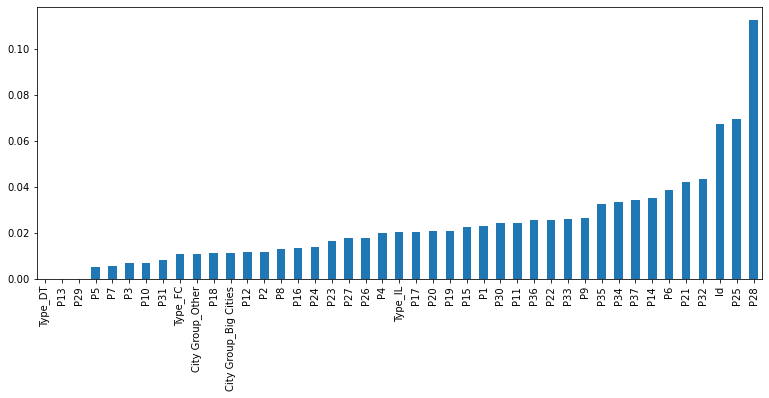

In [36]:
# Random Forest Model Feature Importance
rf_feature_importance = pd.Series(index = X_train.columns, data = np.abs(rf_model.feature_importances_))
n_features = (rf_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(rf_feature_importance))*100:2.2f}%')
rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

# XG Boost Regressor

In [37]:
import xgboost
from sklearn.model_selection import GridSearchCV
params_xgb = {
    'learning_rate': [.1, .5, .7, .9, .95, .99, 1],
    'colsample_bytree': [.3, .4, .5, .6],
    'max_depth': [4],
    'alpha': [3],
    'subsample': [.5],
    'n_estimators': [30, 70, 100, 200]
}

xgb_model = xgboost.XGBRegressor()
xgb_regressor = GridSearchCV(xgb_model, params_xgb, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
xgb_regressor.fit(X_train, y_train)
print(f'Optimal lr: {xgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal colsample_bytree: {xgb_regressor.best_params_["colsample_bytree"]}')
print(f'Optimal n_estimators: {xgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {xgb_regressor.best_score_}')

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

Optimal lr: 0.1
Optimal colsample_bytree: 0.4
Optimal n_estimators: 200
Best score: -0.4354027297965435


In [38]:
xgb_model =  xgboost.XGBRegressor(learning_rate=xgb_regressor.best_params_["learning_rate"], 
                         colsample_bytree=xgb_regressor.best_params_["colsample_bytree"], 
                         max_depth=4, alpha=3, subsample=.5, 
                         n_estimators=xgb_regressor.best_params_["n_estimators"], n_jobs=-1)
xgb = xgb_model.fit(X_train, y_train)
y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse_xgb = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse_xgb:.4f}')
print(f'Test RMSE: {test_rmse_xgb:.4f}')

Train r2 score:  -0.4939848460599927
Test r2 score:  0.14669694579147052
Train RMSE: 0.2870
Test RMSE: 0.5105


# K-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11],
}

knn_model = KNeighborsRegressor()
knn_regressor = GridSearchCV(knn_model, params_knn, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)

In [40]:
knn_regressor.fit(X_train, y_train)
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
print(f'Best score: {knn_regressor.best_score_}')

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             scoring='neg_root_mean_squared_error')

Optimal neighbors: 11
Best score: -0.48401192882510574


In [41]:
knn_model = KNeighborsRegressor(n_neighbors=knn_regressor.best_params_["n_neighbors"])
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_pred = knn_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse_knn = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE KNN: {train_rmse_knn:.4f}')
print(f'Test RMSE KNN: {test_rmse_knn:.4f}')

KNeighborsRegressor(n_neighbors=11)

Train r2 score:  -20.430432083777312
Test r2 score:  -0.005592952378902005
Train RMSE KNN: 0.4485
Test RMSE KNN: 0.5542


# Model Selection- having least RMSE score

In [42]:
model_errors = pd.DataFrame({
    "Model": ["Random Forest Regression", "XGBoost","K-Nearest Neighbors"],
    "Score": [train_rmse_rf, train_rmse_xgb, train_rmse_knn]
})

model_errors.sort_values(by = "Score", ascending = True)

,Model,Score
1,XGBoost,0.287037
0,Random Forest Regression,0.317885
2,K-Nearest Neighbors,0.448531


Random forest Regression has the lowest RMSE score and hence will be used for prediction

# Prediction

In [52]:
rf_pred = rf_model.predict(test.drop('Id', axis=1))

In [53]:
rf_pred

array([15.29308167, 15.4038454 , 15.50602765, ..., 15.34969531,
       15.33736894, 15.28048048])

In [54]:
rf_pred = pd.DataFrame(rf_pred)

In [59]:
rf_pred.tail()

,0
99995,15.303390
99996,15.224715
99997,15.349695
99998,15.337369
99999,15.280480
